## Chunk stats

In [1]:
import json
import os
import matplotlib.pyplot as plt
import numpy as np
import statistics
import tiktoken
tokenizer = tiktoken.get_encoding("o200k_base")

In [2]:
def stat_by_chapter(chunks):
    stats = {}
    for chunk in chunks:
        chapter, text = chunk.get("chapter_name", "unknown"), chunk.get("text", "")
        text_token = len(tokenizer.encode(text))
        if chapter not in stats:
            stats[chapter] = [text_token]
        else:
            stats[chapter].append(text_token)
    stats = dict(sorted(stats.items(), reverse=True))
    return stats

['miner23_3000_1000-416.json', 'miner177_3000_1000-120.json', 'unstructured_chunker-108.json', 'miner5_3000_1000-114.json', 'ai21-112.json', '3000token_subnet_api_v1-432.json']


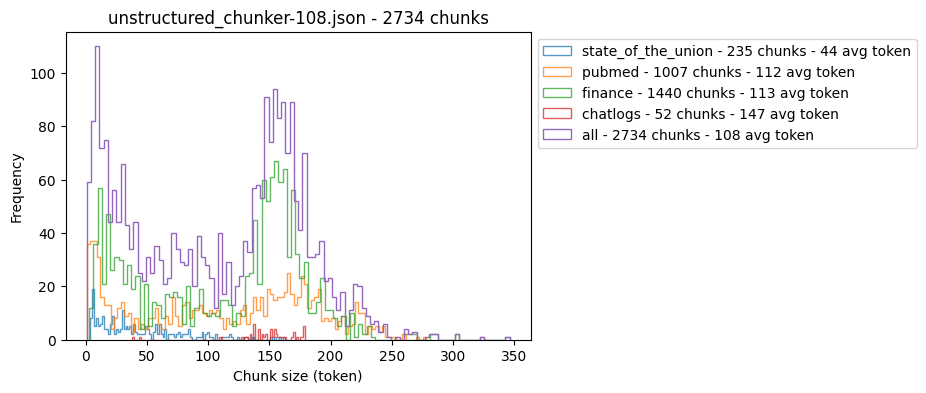

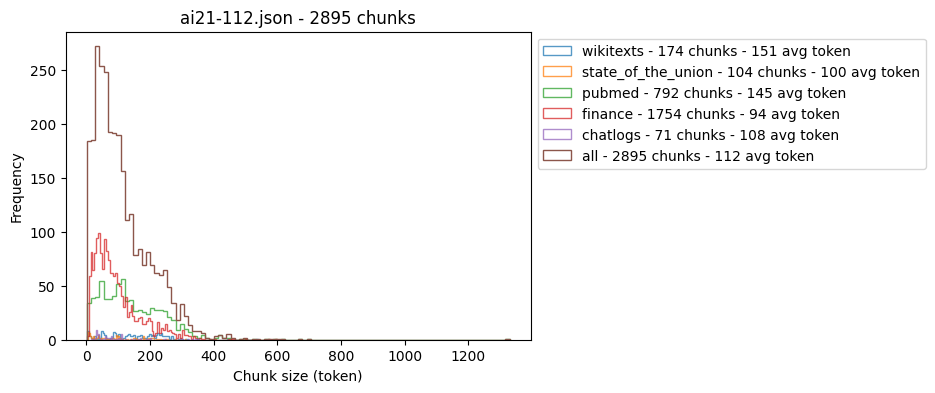

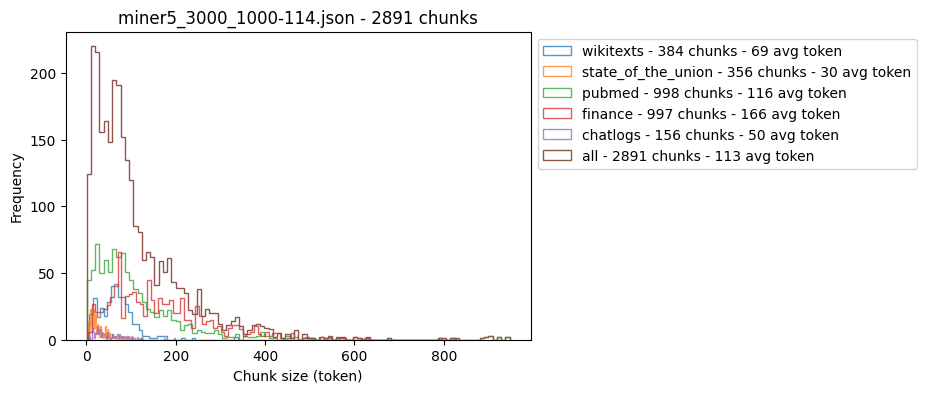

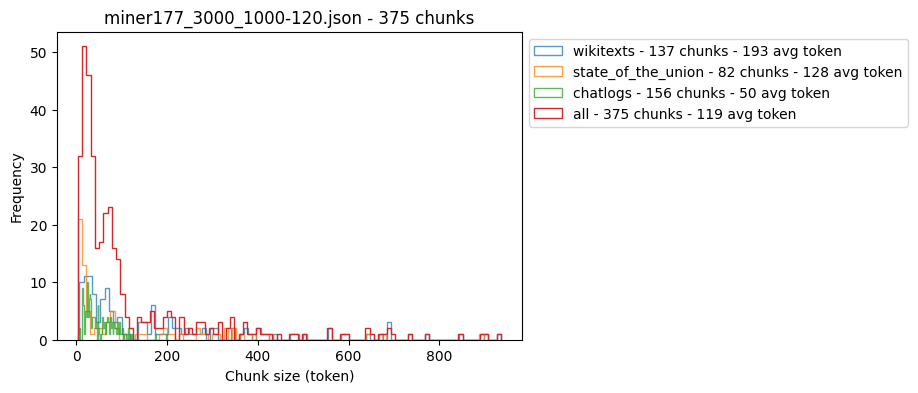

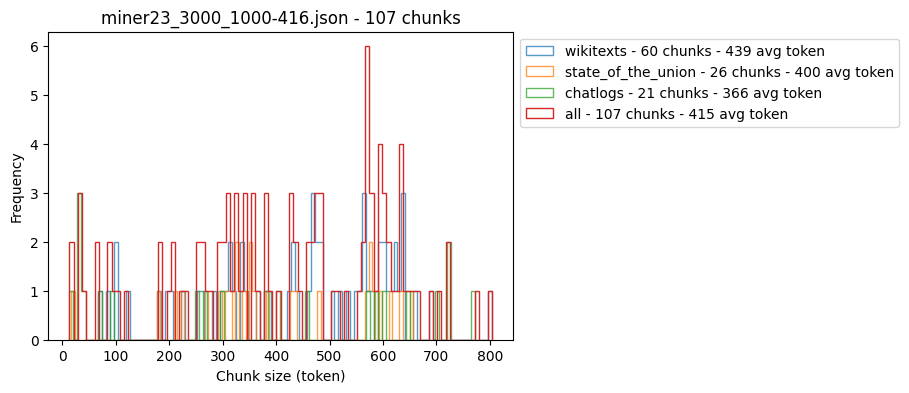

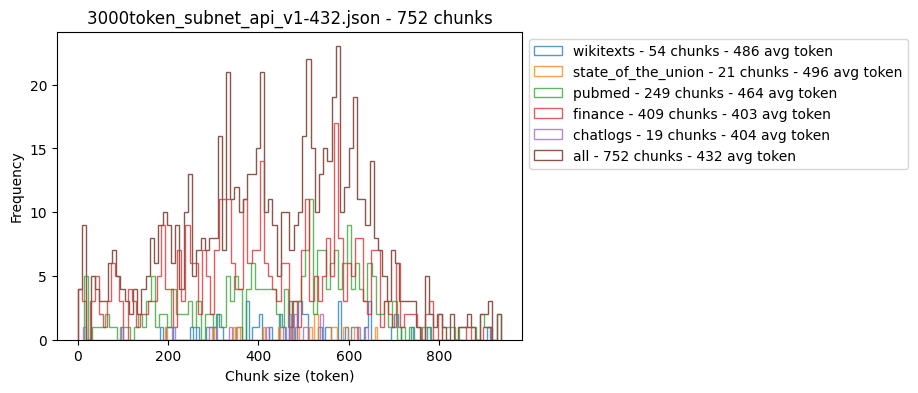

In [4]:
# stats by corpus
CHUNK_DIR = "../assets/chroma/chunks"
path_data_s = os.listdir(CHUNK_DIR)

path_data_s = [path_data for path_data in path_data_s if path_data.endswith(".json")]
print(path_data_s)
path_data_s = sorted(path_data_s, key=lambda x: int(x.split("-")[1].replace(".json", "")))
for path_data in path_data_s:
    path_data = f"{CHUNK_DIR}/{path_data}"
    plt.figure(figsize=(6, 4))
    with open(path_data, "r") as f:
        chunks_with_metadata = json.load(f)
        stats = stat_by_chapter(chunks_with_metadata)
        for chapter, values in stats.items():
            chapter_avg_token = int(np.mean(values))
            chapter_num_chunks = len(values)
            plt.hist(values, bins=100, alpha=0.75, label=f"{chapter} - {chapter_num_chunks} chunks - {chapter_avg_token} avg token", histtype="step")
        chapter_all = [len(tokenizer.encode(chunk["text"])) for chunk in chunks_with_metadata]
        plt.hist(chapter_all, bins=100, histtype="step", label=f"all - {len(chapter_all)} chunks - {int(np.mean(chapter_all))} avg token")
    plt.xlabel("Chunk size (token)")
    plt.ylabel("Frequency")
    # plt.ylim(0, 10)
    plt.title(os.path.basename(path_data) + f" - {len(chunks_with_metadata)} chunks")
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.savefig(f"{CHUNK_DIR}/hist/{os.path.basename(path_data).replace('.json', '.png')}", bbox_inches='tight')
    plt.show()